# Read ALTO data root file
For the format, see https://astroparticle.atlassian.net/wiki/spaces/ALTO/pages/388661281/Prototype+results#Prototyperesults-ROOTdataformat

## The initial data format is described below

`
0	wfana	event	integer	event number : as counted by readout code
Sec2018	unsigned integer	seconds since 1st January 2018, 00:00 UTC
Nanosecond	unsigned integer	nanoseconds in the current second
Q[8]	float (array)	Integrated charge in pe for a gain of 10^7. Integration window= [ToM-1.5*RiseTime, ToM+1.5*FallTime]
TOM[8]	float (array)	in ns, interpolated with a parabola
TTH[8]	float (array)	in ns, linear interpolation: time of crossing of THRESHOLD2 = -100 mV in current version
NSQ[8]	short (array)	number of samples used in the Q integration
A[8]	short (array)	maximum amplitude of the signal, in tenth of mV --> A[i]/10. to be used
TOT[8]	short (array)	Time over Threshold, of -10mV (see the define THRESHOLD -10), in samples
FT[8]	short (array)	Fall Time (after the maximum, so is a rise) in samples
RT[8]	short (array)	Rise Time (before the maximum, so is a fall) in samples
ST[8]	short (array)	Saturation Time in samples
BLF[8]	short (array)	Baseline forward, i.e. before the maximum, in hundredth of mV --> BLF[i]/100. to be used
BLB[8]	short (array)	Baseline backward, i.e. after the maximum, in hundredth of mV --> BLB[i]/100. to be used
RMSBLF[8]	short (array)	RMS Baseline forward, ie before the maximum, in hundredth of mV--> RMSBLF[i]/100. to be used
RMSBLB[8]	short (array)	RMS Baseline backward, ie after the maximum, in hundredth of mV--> RMSBLB[i]/100. to be used
NSBLF[8]	short (array)	N samples available in histogram to compute RMS Baseline forward
NSBLB[8]	short (array)	N samples available in histogram to compute RMS Baseline backward
FWHM[8]	short (array)	Full width at Half Maximum, in samples
QUAL[8]	short (array)	Quality flag: 0 means no signal , 1 means no use of baseline because not reliable, 2 means backward baseline used, 3 means forward baseline used (best case). golden : QUAL[i]>2
samples	short	number of samples(e.g. 1024, 128)
SamplingPeriodPs	short	Sampling Period in picoseconds: you have to multiply values in samples with SamplingPeriodPs/1000. : e.g. FWHM[i]*SamplingPeriodPs/1000.
`

## Using pandas

### Without flattening, easier to select events

Could also flatten later as in https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from root_pandas import read_root
from glob import glob

Welcome to JupyROOT 6.14/04


In [4]:
ch_ids = {0:'CT0',1:'CT1',4:'ST0',11:'ST1',
          5:'SATopCT0',6:'SA_Nth',7:'SA_Mid',10:'ST_Sth',
          2:'TrigBot',3:'TrigTop',8:'CanBot',9:'CanTop'}

In [6]:
DataFiles = glob("../DATA/analyse*")
#DataFiles = glob("~/DAQ/ANALYSEDRUNS/*mar_22_2019_900900000*.root"
print(DataFiles)

['../DATA/analyse_proto_400MHz_128s_mar_11b_2019_900900000_EVTS_12_CHANNELS_111111111111_TRIGMASK_-20_mVTHR_15_ns_2_MAJORITY_3000_MODULOWF_30000_NMEANRATES_2000000_SPLIT_8000_DUMP_12.00_HOURSRATEMON_00128.root']


## Start by reading just one event, to see if everything is okay

In [7]:
# Start by reading in just one event, to see if everything is okay
chunk_df = read_root(DataFiles,'WFANA',
                     chunksize=1)

df = next(chunk_df)
print(df.columns)
if 'wfana_Q' in df.columns:
    print((df.columns[df.columns=='wfana_Q'])[0])
    SamplingPeriodPs = df.iloc[0]['wfana_SamplingPeriodPs']
    Num_chans = len(df.iloc[0]['wfana_Q'])
    
else:
    print('No waveform data??!!')
df.head(3)

Index(['wfana_event', 'wfana_Sec2018', 'wfana_Nanosecond', 'wfana_Q',
       'wfana_TOM', 'wfana_TTH', 'wfana_NSQ', 'wfana_A', 'wfana_TOT',
       'wfana_FT', 'wfana_RT', 'wfana_ST', 'wfana_BLF', 'wfana_BLB',
       'wfana_RMSBLF', 'wfana_RMSBLB', 'wfana_NSBLF', 'wfana_NSBLB',
       'wfana_FWHM', 'wfana_QUAL', 'wfana_samples', 'wfana_SamplingPeriodPs',
       'addswc'],
      dtype='object')
wfana_Q


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


wfana_event  wfana_Sec2018  wfana_Nanosecond  \
0    256000001       37868446         946278000   

                                             wfana_Q  \
0  [-46.96669, -53.976936, -0.2290852, -0.0367763...   

                                           wfana_TOM  \
0  [151.10178, 156.74281, 99.21875, 82.835365, 14...   

                                           wfana_TTH  \
0  [145.79799, 150.70985, -1000.0, -1000.0, 138.3...   

                                    wfana_NSQ  \
0  [25, 19, 12, 8, 41, 12, 5, 35, 9, 8, 8, 9]   

                                             wfana_A  \
0  [-2769, -3376, -23, -21, -9127, -52, -17, -106...   

                                  wfana_TOT  \
0  [21, 15, 0, 0, 36, 0, 0, 19, 0, 0, 0, 0]   

                                  wfana_FT  \
0  [12, 8, 2, 3, 23, 2, 1, 15, 1, 2, 3, 1]   

                         ...                          \
0                        ...                           

                                           wfana_BLB  \
0  [-37, -80, 148, -162, -10000, 33, -125, 35, 12...   

                                        wfana_RMSBLF  \
0  [92, 106, 80, 70, 73, 201, -10000, 82, 91, 88,...   

                                        wfana_RMSBLB  \
0  [106, 136, 82, 81, -10000, 95, 76, 48, 90, 83,...   

                                        wfana_NSBLF  \
0  [53, 56, 37, 26, 52, 66, 3, 54, 24, 31, 54, 110]   

                                     wfana_NSBLB  \
0  [14, 27, 66, 37, 3, 29, 74, 9, 81, 68, 45, 0]   

                              wfana_FWHM  \
0  [5, 6, 3, 3, 9, 4, 2, 10, 2, 4, 5, 3]   

                             wfana_QUAL wfana_samples wfana_SamplingPeriodPs  \
0  [3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]           128                   2500   

                                              addswc  
0  [9615.385, 4807.6924, 0.0, 0.0, 43269.23, 0.0,...  

[1 rows x 23 columns]

## Define iterator for reading in chunks

In [83]:
# Read in by chunks (note could add "columns=" to avoid reading some columns)
chunk_df = read_root(DataFiles[0],'WFANA',
                     chunksize=10000)

# But, columns seems to not work, because of the "_" in the name (tested using "wfana*" okay, "wfana_*" not)
'''chunk_df = read_root(DataFiles[0],'WFANA',
                     columns=['wfana_event', 'wfana_Sec2018', 'wfana_Nanosecond', 'wfana_Q',
                              'wfana_TOM', 'wfana_TTH', 'wfana_NSQ', 'wfana_A', 'wfana_TOT',
                              'wfana_FT', 'wfana_RT', 'wfana_ST', 'wfana_FWHM', 'wfana_QUAL'],
                     chunksize=10000)'''

"chunk_df = read_root(DataFiles[0],'WFANA',\n                     columns=['wfana_event', 'wfana_Sec2018', 'wfana_Nanosecond', 'wfana_Q',\n                              'wfana_TOM', 'wfana_TTH', 'wfana_NSQ', 'wfana_A', 'wfana_TOT',\n                              'wfana_FT', 'wfana_RT', 'wfana_ST', 'wfana_FWHM', 'wfana_QUAL'],\n                     chunksize=10000)"

## Define some functions to drop rows / columns

In [78]:
def drop_rows(df):
    '''
    Input:  df
    Return: df with events with bad QUAL or Saturated channels dropped, and columns QUAL and ST dropped
    '''

    # This shows which events have all channels with QUAL excluding 1 (so not any channel with 1)
    qual_ne1 = [1 not in QUALs for QUALs in df['wfana_QUAL']]
    #print(sum(qual_ne1),qual_ne1)

    # This shows which events have all channels with STs equal to 0 (so, no channel with saturation)
    unsatur = [all(STs == 0) for STs in df['wfana_ST']]
    #print(sum(unsatur),unsatur)

    combined = [a and b for a,b in zip(unsatur,qual_ne1)] 

    print(sum(qual_ne1),sum(unsatur),sum(combined))
    #print(len(df[combined]))

    #df = df.drop([not combined])

    comb_indices = [df.index[i] for i in range(len(combined)) if combined[i] == False ]
    #print(len(comb_indices))

    df = df.drop(comb_indices,axis=0)
    #print(len(df))

    # Once Qual and ST are used to restrict the data-set, then they can be dropped
    df.drop(['wfana_QUAL', 'wfana_ST'],axis=1)

    return df

In [81]:
def drop_cols(df):
    df = df.drop(['wfana_BLF', 'wfana_BLB', 'wfana_RMSBLF', 'wfana_RMSBLB', 
                  'wfana_NSQ', 'wfana_NSBLF', 'wfana_NSBLB',
                  'wfana_samples', 'wfana_SamplingPeriodPs', 'addswc'],axis=1)
    #print(df.columns)
    return df

## Loop over chunks

In [90]:
type(df.iloc[0]['wfana_Q'])

numpy.ndarray

In [84]:
import subprocess

while True:
    try:
        df = next(chunk_df)
    except:
        print("Error")
        break
    
    df = drop_cols(df)
    df = drop_rows(df)
    
    df.to_csv("tmp_ALTO_reduced.gz",compression='gzip')

    subprocess.run(["touch","ALTO_reduced.gz"])

    with open("ALTO_reduced.gz","ba") as out:
        #subprocess.Popen("cat tmp_ALTO_reduced.gz",stdout=out)
        subprocess.call(["cat","tmp_ALTO_reduced.gz"], stdout=out)
    subprocess.run(["rm","tmp_ALTO_reduced.gz"])

/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9697 9697


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9708 9708


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9728 9728


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9716 9716


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9708 9708


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9719 9719


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9735 9735


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9701 9701


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9706 9706


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9757 9757


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9713 9713


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9718 9718


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9703 9703


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9758 9758


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9737 9737


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9749 9749


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9745 9745


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9755 9755


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9722 9722


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9732 9732


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9703 9703


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9722 9722


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9753 9753


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9724 9724


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9761 9761


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9731 9731


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9756 9756


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9745 9745


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9735 9735


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9754 9754


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9743 9743


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9749 9749


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9769 9769


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9753 9753


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9718 9718


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9757 9757


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9760 9760


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9707 9707


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9758 9758


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9736 9736


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9736 9736


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9721 9721


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9699 9699


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9758 9758


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9752 9752


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9741 9741


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9761 9761


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9727 9727


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9750 9750


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9743 9743


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9738 9738


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9755 9755


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9744 9744


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9753 9753


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9719 9719


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9747 9747


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9735 9735


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9731 9731


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9755 9755


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9719 9719


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9752 9752


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9730 9730


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9714 9714


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9757 9757


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9741 9741


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9747 9747


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9751 9751


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9764 9764


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9731 9731


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9702 9702


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9715 9715


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9731 9731


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9761 9761


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9749 9749


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9723 9723


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9750 9750


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9735 9735


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9728 9728


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9742 9742


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9735 9735


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9722 9722


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9733 9733


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9722 9722


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9709 9709


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9728 9728


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9751 9751


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9747 9747


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9742 9742


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9736 9736


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9730 9730


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9745 9745


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9727 9727


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9723 9723


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9732 9732


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9758 9758


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9743 9743


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9751 9751


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9703 9703


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9753 9753


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9733 9733


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9769 9769


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9736 9736


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9714 9714


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9749 9749


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9767 9767


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9724 9724


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9757 9757


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9770 9770


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9721 9721


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9724 9724


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9737 9737


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9752 9752


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9732 9732


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9721 9721


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9766 9766


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9744 9744


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9758 9758


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9760 9760


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9745 9745


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9723 9723


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9744 9744


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9768 9768


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9724 9724


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9740 9740


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9714 9714


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9759 9759


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9728 9728


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9753 9753


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9754 9754


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9725 9725


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9736 9736


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9722 9722


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9734 9734


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9749 9749


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9742 9742


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9729 9729


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9717 9717


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9750 9750


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9733 9733


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9748 9748


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9746 9746


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9777 9777


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9731 9731


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9740 9740


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9730 9730


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9739 9739


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9743 9743


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9720 9720


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9700 9700


/scr/punch/miniconda3/lib/python3.6/site-packages/root_pandas/readwrite.py:314: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


10000 9779 9779
Error


## Test plotting various things in a panda structure which has Series/arrays within cells

/scr/punch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/scr/punch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


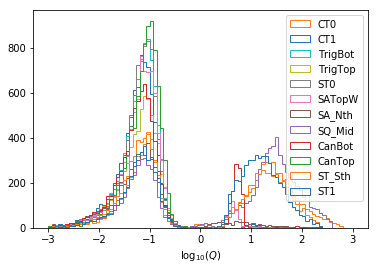

In [8]:
import pandas as pd

l10_QsT = np.log10((-df['wfana_Q']).apply(pd.Series).transpose())


#plt.hist(Qs.transpose(),range=(-3,3),bins=90,histtype='step')
plt.hist(l10_QsT,range=(-3,3),bins=90,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(Q)$')
plt.show()

/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


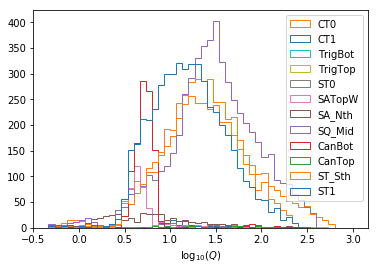

In [9]:
plt.hist(l10_QsT,range=(-1/3,3),bins=50,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(Q)$')
plt.show()

In [10]:
# Get the log10 of the Amplitude (in tenths of mV), subtract 1 to turn into log10(mV)
l10_AsT = np.log10((-df['wfana_A']).apply(pd.Series).transpose())-1

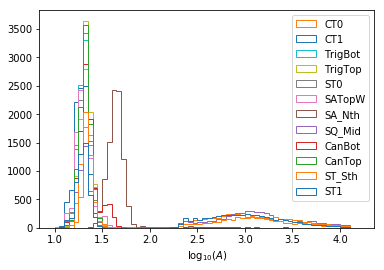

In [11]:
plt.hist(l10_AsT,range=(1,4.2),bins=64,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(A)$')
plt.show()

In [12]:
TOMsT = (df['wfana_TOM']).apply(pd.Series).transpose()

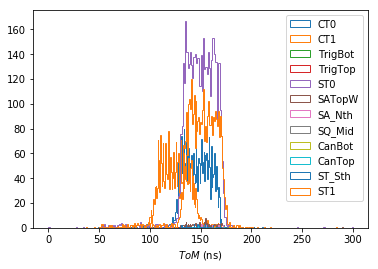

In [13]:
#plt.hist(TOMsT.iloc[0][l10_QsT.iloc[0]>.3],bins=256,histtype='step')
for i in range(Num_chans):
    plt.hist(TOMsT.iloc[i][l10_QsT.iloc[i]>1],bins=256,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$ToM$ (ns)')
plt.show()

### Example of plotting one thing vs another for the same channels within an event

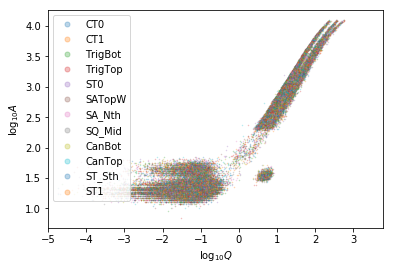

In [14]:
#plt.plot(l10_QsT.iloc[0],l10_AsT.iloc[0],'.')
plt.plot(l10_QsT,l10_AsT,'.',ms=1,alpha=.3)
plt.xlim(xmin=-5)
plt.xlabel(r'$\log_{10}Q$')
plt.ylabel(r'$\log_{10}A$')
plt.legend([ch_ids[i] for i in range(Num_chans)],markerscale=10)
plt.show()

### Example of plotting one thing vs another for different channels within an event

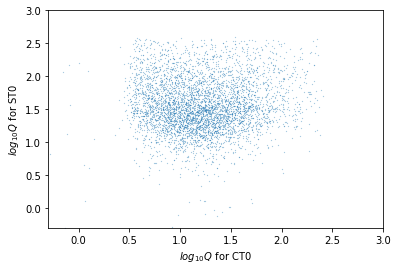

In [15]:
xax,yax = 0,4 # ST0 vs CT0
#xax,yax = 0,1 # CT1 vs CT0
plt.plot(l10_QsT.iloc[xax],l10_QsT.iloc[yax],'.',ms=.3)
plt.xlim((-.3,3))
plt.ylim((-.3,3))
plt.xlabel(r'$log_{10}Q$ for '+ch_ids[xax])
plt.ylabel(r'$log_{10}Q$ for '+ch_ids[yax])
plt.show()
#plt.scatter(l10_QsT.iloc[0],l10_QsT.iloc[4],marker='.',ms=.1)

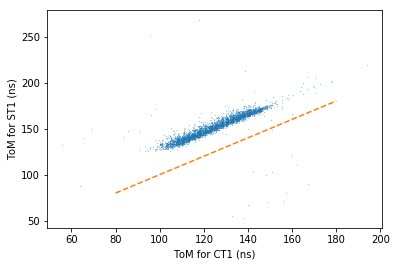

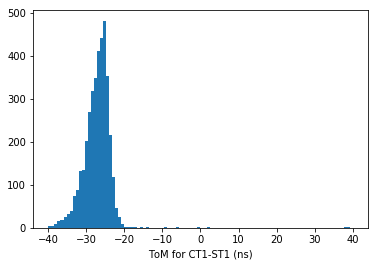

In [16]:
xax,yax = 0,4 # ST0 vs CT0
xax,yax = 1,11 # ST1 vs CT1
#xax,yax = 0,1 # CT1 vs CT0
#xax,yax = 4,11 # ST1 vs ST0
both = [a and b for a,b in zip(l10_QsT.iloc[xax]>.3,l10_QsT.iloc[yax]>.3)] 
plt.plot(TOMsT.iloc[xax][both],TOMsT.iloc[yax][both],'.',ms=.3)
plt.plot(np.linspace(80,180,100),np.linspace(80,180,100),ls='--')
#plt.xlim((-.3,3))
#plt.ylim((-.3,3))
plt.xlabel('ToM for '+ch_ids[xax]+' (ns)')
plt.ylabel('ToM for '+ch_ids[yax]+' (ns)')
plt.show()
#plt.scatter(l10_QsT.iloc[0],l10_QsT.iloc[4],marker='.',ms=.1)

plt.hist(TOMsT.iloc[xax][both]-TOMsT.iloc[yax][both],bins=100,range=(-40,40))
plt.xlabel('ToM for '+ch_ids[xax]+'-'+ch_ids[yax]+' (ns)')
plt.show()
